# Multiagent reinforcement learning:
## Finding the Nash Equilibrium in Prisoners' Dilemma 

Robbie Culkin

Watch this Khan Academy clip for a lesson in game theory and a great description of the problem:
[Khan Academy video on Prisoners' Dilemma](https://youtu.be/UkXI-zPcDIM)

TL;DW: 2 prisoners, each has the choice to confess or deny a crime that they committed together. If both prisoners confess, they both serve 3 years in prison. If neither confess, they each serve 2 years. If one confesses and the other denies, the snitch serves 1 year while the holdout serves 10. Neither prisoner knows what the other prisoner will do.


This table, drawn by Sal Khan, maps out the Prisoners' Dilemma:

<img src="p_dilemma.png">

As explained in the video, Nash's Equilibrium tells us that the optimal choice in this situation is to confess.

In this notebook I'll develop an iterative Q-learner that arrives at the same conclusion by pitting two non-cooperative agents against each other.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Define the sentencing function
Now, both prisoners learn iteratively, so we'll leave the opponent's choice until later.

In [2]:
# 0 -> deny
# 1 -> confess

# return value: years sentenced to prison (self, opponent)
# learner seeks to minimize this function, but is unaware of its rules
def sentence(choice, opponent_choice): 
    if choice == 1:
        if opponent_choice == 1:
            return (3,3)
        if opponent_choice == 0:
            return (1,10)
        
    elif choice == 0:
        if opponent_choice == 1:
            return (10,1)
        if opponent_choice == 0:
            return (2,2)

## Q Table

The Bellman equation: 

$Q_{i+1}(s,a) = r + γ(max(Q_i(s,a))$

Our problem is slightly different:
* Only one possible state
* Our reward function is really a punishment function, so we seek to minimize it

So our new $Q$ function looks like this:

$Q_{i+1}(a) = r $, where $r = \frac{sentence_{max} - sentence_i}{sentence_{max}}$

Pretty simple! I'll also use a learning rate to scale back changes to Q and an epsilon value for exploration. For more on those topics look [here](https://studywolf.wordpress.com/2012/11/25/reinforcement-learning-q-learning-and-exploration/).

In [3]:
Q1 = np.zeros(2) # 2 possible actions, only one possible state
Q2 = np.zeros(2)

# hyperparameters 
lr = .01                       #learning rate
n_episodes = 5000             #number of training iterations
epsilon = 0.5                 #exploration
Q1s = np.zeros([n_episodes,2])
Q2s = np.zeros([n_episodes,2])
max_sentence = 10.0

for i in range(n_episodes):    
    # Choose an action, with noise that tapers over episodes   
    if random.random() < epsilon:
        a1 = np.argmax(np.random.randn(1,len(Q1)))#*(1./(i+1)))
        a2 = np.argmax(np.random.randn(1,len(Q2)))#*(1./(i+1))) 
    else:
        a1 = np.argmax(Q1 + np.random.randn(1,len(Q1))*(1./(i+1)))
        a2 = np.argmax(Q2 + np.random.randn(1,len(Q2))*(1./(i+1)))
    
    # determine a sentence based on the action
    r1 = (max_sentence - sentence(a1,a2)[0])/max_sentence
    r2 = (max_sentence - sentence(a1,a2)[1])/max_sentence
    
    #update Q table based on which of the new input           
    Q1[a1] = Q1[a1] + lr*(r1 - Q1[a1])
    Q2[a2] = Q2[a2] + lr*(r2 - Q2[a2])
    
    Q1s[i] = Q1
    Q2s[i] = Q2

In [4]:
print Q1 #probability of choosing [0,1] aka [P(deny), P(confess)]
print Q2

[ 0.45055575  0.73385937]
[ 0.42234453  0.72938503]


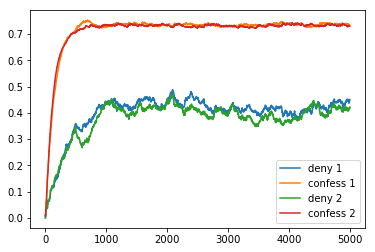

In [5]:
plot(xrange(n_episodes), Q1s.T[0])
plot(xrange(n_episodes), Q1s.T[1])

plot(xrange(n_episodes), Q2s.T[0])
plot(xrange(n_episodes), Q2s.T[1])

legend(['deny 1','confess 1','deny 2','confess 2'])

The two agents iteratively learn to confess, arriving at the *Nash Equilibrium*.